# Examen Módulo 2 - Montecarlo - 4.

**Mantenga la calma y lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen2_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen2_ArellanoCarlos*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`+`B`) o (`Esc`+`A`).
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor absténgase de preguntar.

# Carlos Riolo Sotelo
- Examen 2
- 17/04/2023

---
### Integración Montecarlo tipo 1 <font size='1'>(25 puntos)</font>

Encuentre los valores de $y(0.3)$, $y(0.5)$, $y(0.7)$, $y(0.9)$ y $y(1.1)$, conociendo $y(0.1)=0.1$ y su derivada
$$
\frac{dy}{dx}=\frac{\ln(2+\sin(2x^2))}{xe^{-x^3}},\quad y(0.1)=0.1
$$

Para cada intervalo: $(0.1\leq x\leq0.3)$, $(0.3\leq x\leq0.5)$, $(0.5\leq x\leq0.7)$, $(0.7\leq x\leq0.9)$ y $(0.9\leq x\leq1.1)$ use integración Montecarlo de tipo 1 con $10^6$ puntos.

1. Escriba la función de integración Montecarlo de tipo 1, con argumentos de entrada $f$, $a$, $b$ y $N$. Donde $f$ es la función a integrar, $a$ y $b$ son los límites de integración y $N$ es el número de puntos utilizados para la integración. Y que regrese el valor de la integral.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import random
random.seed(0)

In [5]:
def montecarlo1(f1,N,a,b):
    u=np.random.uniform(a,b,N)
    return np.mean(f1(u))*(b-a)
N=np.logspace(1,6,6)

2. Defina la función a integrar con argumentos de entrada $x$ y que regrese el valor de la derivada $\frac{dy}{dx}$.

In [2]:
def f1(x):
    return ((np.log(2+np.sin(2*x**2)))/(x*np.exp(-1*x**3)))

3. Encuentre la aproximación de las integrales con el método de Montecarlo de tipo 1. Escriba sus resultados en un _DataFrame_ de _pandas_.

In [23]:
#Primer Intervalo
a=0.1
b=0.3
tabla1=pd.DataFrame(columns=["Aprox. Intervalo 1"], index=N)

for i in N:
    aprox=montecarlo1(f1,int(i),a,b)
    tabla1.loc[i,"Aprox. Intervalo 1"]=aprox
    

In [24]:
#Segundo Intervalo
a=0.3
b=0.5
tabla2=pd.DataFrame(columns=["Aprox. Intervalo 2"], index=N)

for i in N:
    aprox=montecarlo1(f1,int(i),a,b)
    tabla2.loc[i,"Aprox. Intervalo 2"]=aprox
    

In [25]:
#Tercer Intervalo
a=0.5
b=0.7
tabla3=pd.DataFrame(columns=["Aprox. Intervalo 3"], index=N)

for i in N:
    aprox=montecarlo1(f1,int(i),a,b)
    tabla3.loc[i,"Aprox. Intervalo 3"]=aprox
    

In [26]:
#Cuarto Intervalo
a=0.7
b=0.9
tabla4=pd.DataFrame(columns=["Aprox. Intervalo 4"], index=N)

for i in N:
    aprox=montecarlo1(f1,int(i),a,b)
    tabla4.loc[i,"Aprox. Intervalo 4"]=aprox
    

In [27]:
#Quinto Intervalo
a=0.9
b=1.1
tabla5=pd.DataFrame(columns=["Aprox. Intervalo 5"], index=N)

for i in N:
    aprox=montecarlo1(f1,int(i),a,b)
    tabla5.loc[i,"Aprox. Intervalo 5"]=aprox
    

In [28]:
pd.concat([tabla1,tabla2,tabla3,tabla4,tabla5],axis=1)

,Aprox. Intervalo 1,Aprox. Intervalo 2,Aprox. Intervalo 3,Aprox. Intervalo 4,Aprox. Intervalo 5
10.0,0.806418,0.451013,0.411002,0.455414,0.576241
100.0,0.778385,0.455288,0.408323,0.455627,0.572358
1000.0,0.808978,0.453273,0.408261,0.457453,0.583166
10000.0,0.808188,0.455901,0.408168,0.455948,0.58401
100000.0,0.807144,0.455658,0.408134,0.455785,0.583717
1000000.0,0.806894,0.455484,0.408143,0.455762,0.583671


4. Use el teorema fundamental del cálculo (visto en cálculo integral) para escribir la secuencia de valores para la solución $y(x)$, esto es $[y(0.1), y(0.3), y(0.5), y(0.7), y(0.9), y(1.1)]$.

Note que $y(0.3)=y(0.1)+\int_{0.1}^{0.3}\frac{dy}{dx}dx$, $y(0.5)=y(0.3)+\int_{0.3}^{0.5}\frac{dy}{dx}dx$, etc.

In [50]:
int1=list(tabla1["Aprox. Intervalo 1"])
int2=list(tabla2["Aprox. Intervalo 2"])
int3=list(tabla3["Aprox. Intervalo 3"])
int4=list(tabla4["Aprox. Intervalo 4"])
int5=list(tabla5["Aprox. Intervalo 5"])

In [53]:
#Para y(0.3)
y03=0.1+int1[-1]
y05=y03+int2[-1]
y07=y05+int3[-1]
y09=y07+int4[-1]
y11=y09+int5[-1]
listay=[y03,y05,y07,y09,y11]
listay

[0.9068940296789335,
 1.3623783609265847,
 1.770521289445804,
 2.226282885126683,
 2.8099540353156947]

---
### Integración Montecarlo tipo 2 <font size='1'>(25 puntos)</font>
Encuentre el área que cumpla $f(x,y)>v$, donde 
$$
f(x,y)=e^{-0.05(x^2+y^2)}\sin(x^2+y^2),
$$
y $v=0.5$.

1. Escriba la función que discrimine los puntos que satisfacen la restricción $f(x,y)>v$, con argumentos de entrada $x$ y $y$ y que regrese Verdadero o Falso.

In [64]:
def fun2(x,y):
    return (np.exp(-0.05*(x**2+y**2)))*(np.sin(x**2+y**2)) > 0.5

2. Encuentre los límites de integración para $x$ y para $y$ que encierren el área deseada y grafique.

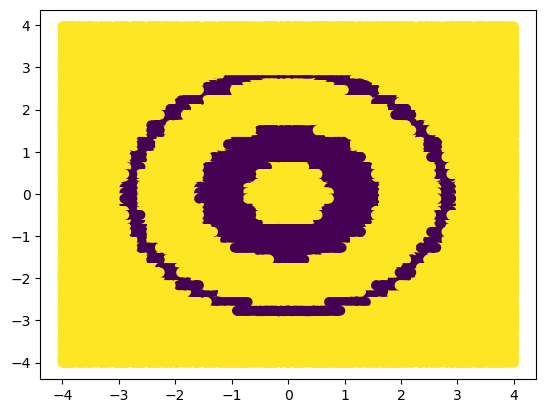

In [78]:
x=np.random.uniform(-4,4,500)
y=np.random.uniform(-4,4,500)

X,Y=np.meshgrid(x,y)

plt.figure()
plt.scatter(X,Y,c=~fun2(X,Y))

3. Escriba la función para integrar con el método de Montecaralo de tipo 2 con argumentos de entrada $f$, $xmin$, $xmax$, $ymin$, $ymax$, y $N$. Donde $f$ es una función que define la región de integración; $xmin$, $xmax$, $ymin$ y $ymax$ definen los límites de integración y $N$ el número de puntos en $x$ y $y$ para usar en el método. Esta función debe regresar el valor de la integral.

In [79]:
def montecarlito(region,ax,bx,ay,by,N):
    x=np.random.uniform(ax,bx,N)
    y=np.random.uniform(ay,by,N)
    
    B=region(x,y)
    AR=(bx-ax)*(by-ay)
    
    return np.mean(B)*AR

4. En un _DataFrame_ de _pandas_ escriba el valor de **las integrales** y la **estimación del error relativo** para $N=10^4,\, 10^5,\, 10^6$.

In [81]:
tabla_act=pd.DataFrame(columns=["Aproximación"],index=M)
M=[10**4,10**5,10**6]

for i in M:
    aprox=montecarlito(fun2,-3,3,-3,3,int(i))
    tabla_act.loc[i,"Aproximación"]=aprox
tabla_act

,Aproximación
10000,10.9188
100000,10.87848
1000000,10.902528


---
### Generación de fractales <font size='1'>(25 puntos)</font>

Los fractales de tipo Barnsley se generan con transformaciones afines con cierta probabilidad.

Genere un helecho tridimensional con la ecuación:
$$
\begin{bmatrix}x_{k+1}\\y_{k+1}\\z_{k+1}
\end{bmatrix}=A_i\begin{bmatrix}x_k\\y_k\\z_k\end{bmatrix}+b_i
$$
Y sus respectivas matrices:

In [84]:
import numpy as np
i=np.arange(4)
A0 = np.array([[0,0,0],[0,0.18,0],[0,0,0]])
b0 = np.array([0,0,0])

A1 = np.array([[0.85,0,0],[0,0.85,0.1],[0,-0.1,0.85]])
b1 = np.array([0,1.6,0])

A2 = np.array([[0.2,-0.2,0],[0.2,0.2,0],[0,0,0.3]])
b2 = np.array([0,0.8,0])

A3 = np.array([[-0.2,0.2,0],[0.2,0.2,0],[0,0,0.3]])
b3 = np.array([0,0.8,0])

prob_i=np.array([0.25,0.25,0.25,0.25])

cuya probabilidad es la misma para cada $i=\{0,1,2,3\}$. Use la función scatter de una proyección 3D sobre los ejes:
```
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.gca(projection='3d')
ax.scatter(x,y,z)
```

In [113]:
x=np.array([0,0,0])
x_inicial=np.array([0,0,0])
x_historial=[0]
y_historial=[0]
z_historial=[0]
N=100000

A_lista=[A0,A1,A2,A3]
b_lista=[b0,b1,b2,b3]

for k in range(N):
    i_actual=random.choices(i,prob_i)[0]
    
    A=A_lista[i_actual]
    b=b_lista[i_actual]
    
    x= A@x + b
    x_historial.append(x[0])
    y_historial.append(x[1])
    z_historial.append(x[2])

C:\Users\Maru\AppData\Local\Temp\ipykernel_1148\1563350961.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=fig.gca(projection='3d')


Object `ax.rotate` not found.


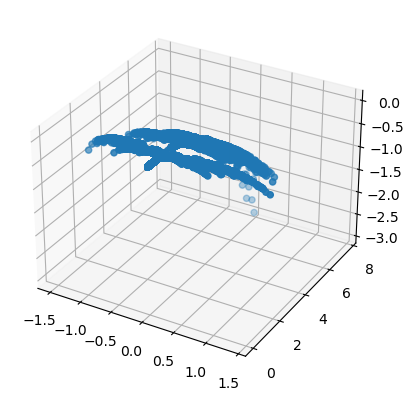

In [115]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.gca(projection='3d')
ax.scatter(x_historial,y_historial,z_historial)


In [117]:
fig.gca?

---
### Probabilidad Precio-Umbral <font size='1'>(25 puntos)</font>

Suponga que desea invertir en **Oracle** o **Intel**. Evalúe la probabilidad de obtener un retorno del 10% en tres meses a partir del 31 de octubre del 2022.

1. Describa una función para obtener los precios de cierre ajustados para dividendos y divisiones desde *YAHOO finance*, usando el paquete de *yfinance*, donde los argumentos de entrada sean los nombres de las empresas y las fechas de inicio y fin a los cuales se obtendrán los datos.

In [2]:
import yfinance as yf
import pandas_datareader.data as web

def getClose(names, start, end):
    return yf.download(names,start=start, end=end)["Adj Close"]

2. Obtenga los precios de cierre ajustados para Intel y Oracle desde el 31 de octubre de 2021 al 31 de octubre de 2022.

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:ylabel='Frequency'>

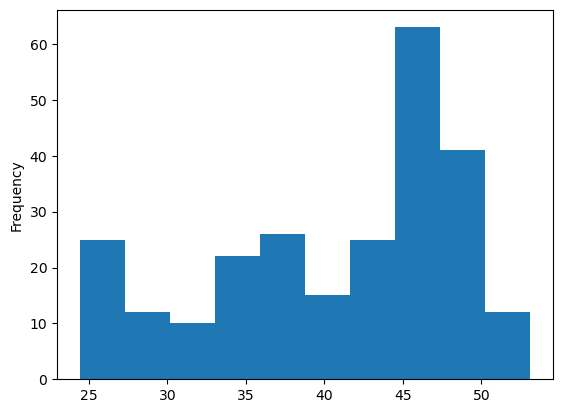

In [3]:
data_intel=getClose("INTC", "2021-10-31", "2022-10-31")
data_intel.plot.hist()

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:ylabel='Frequency'>

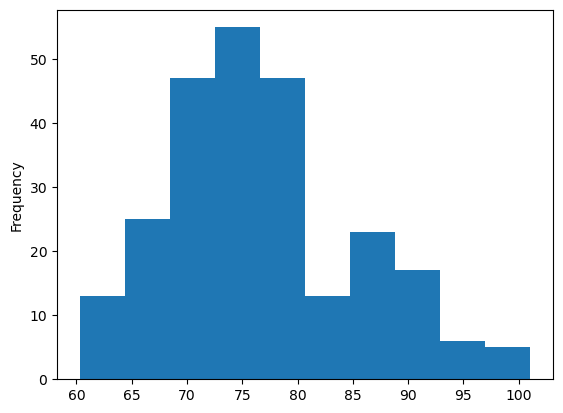

In [4]:
data_orcl=getClose("ORCL", "2021-10-31", "2022-10-31")
data_orcl.plot.hist()

3. Calcule el rendimiento **simple** para ambas empresas.

<AxesSubplot:ylabel='Frequency'>

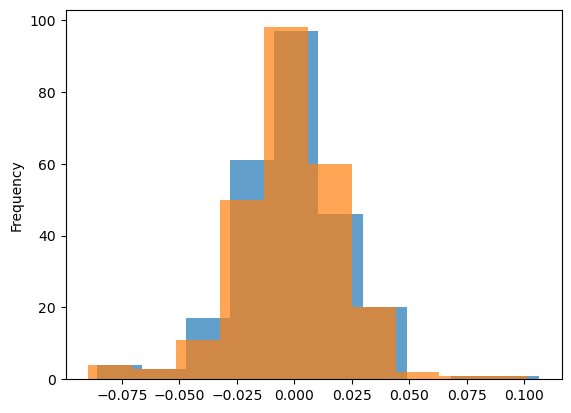

In [5]:
#Para INTC
R1=(data_intel-data_intel.shift())/data_intel.shift()
r1=np.log(data_intel/data_intel.shift())
R1.plot.hist(alpha=0.7) #Azul
r1.plot.hist(alpha=0.7) #Naranja

<AxesSubplot:ylabel='Frequency'>

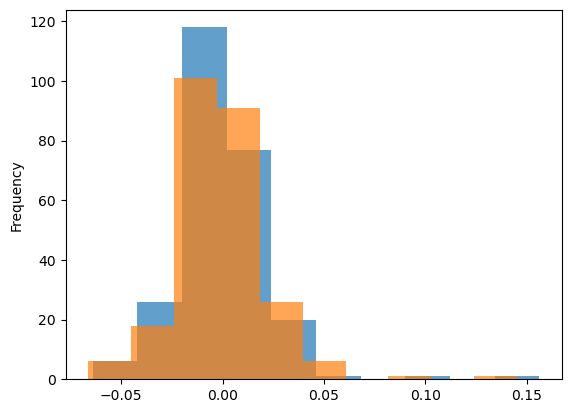

In [6]:
#Para ORCL
R2=(data_orcl-data_orcl.shift())/data_orcl.shift()
r2=np.log(data_orcl/data_orcl.shift())
R2.plot.hist(alpha=0.7) #Azul
r2.plot.hist(alpha=0.7) #Naranja

4. Escriba una función que, dando como argumentos:
* la media,
* la desviación estandar,
* la fecha de inicio,
* **la fecha del fin de simulación** (**NO el número de días**) y
* número de escenarios a simular;

regrese en un _DataFrame_ de _pandas_ cuyo índice sea el rango de fechas dadas como argumentos.

In [7]:
def sim_rend(media, std, inicio, final, N):
    fec=pd.date_range(start=inicio, end=final)
    dias=len(fec)-1
    r=np.random.normal(media,std, size=(dias,N))
    fechas = pd.date_range(inicio, periods=dias)
    return pd.DataFrame(index=fechas, data=r)

5. Calcule la media y desviación estandar de los rendimientos y simule 100000 escenarios de rendimientos desde el 31 de octubre de 2022 al 5 de febrero de 2023.

In [8]:
R_intel_std=R1.std()
R_intel_mean=R1.mean()

In [9]:
R_orcl_std=R2.std()
R_orcl_mean=R2.mean()

(array([ 5.,  2., 12., 12., 26., 20., 11.,  6.,  3.]),
 array([-0.06173122, -0.04982236, -0.03791349, -0.02600463, -0.01409576,
        -0.0021869 ,  0.00972197,  0.02163083,  0.0335397 ,  0.04544856]),
 <BarContainer object of 9 artists>)

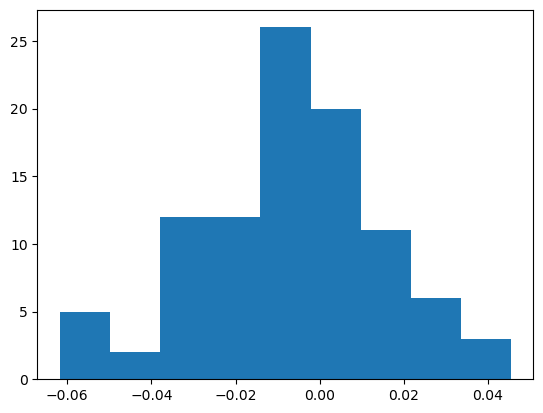

In [10]:
R_intel_simulados1=np.random.normal(R_intel_mean, R_intel_std, size=97)
plt.figure()
plt.hist(R_intel_simulados1, bins=9)

(array([ 2.,  2.,  7., 15., 21., 16., 20.,  6.,  5.,  3.]),
 array([-5.39057969e-02, -4.31375232e-02, -3.23692495e-02, -2.16009757e-02,
        -1.08327020e-02, -6.44282424e-05,  1.07038455e-02,  2.14721192e-02,
         3.22403930e-02,  4.30086667e-02,  5.37769404e-02]),
 <BarContainer object of 10 artists>)

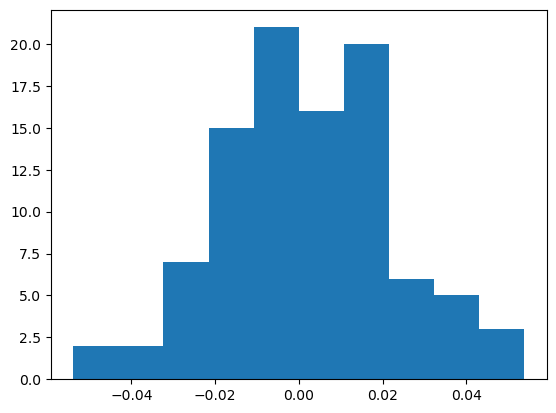

In [11]:
R_orcl_simulados1=np.random.normal(R_orcl_mean, R_orcl_std, size=97)
plt.figure()
plt.hist(R_orcl_simulados1, bins=10)

In [16]:
rend_sim_intc=sim_rend(R_intel_mean, R_intel_std, "2022-10-31", "2023-02-05",100000)

precio_sim_intc=(rend_sim_intc+1).cumprod()*data_intel[-1]

In [18]:
rend_sim_orcl=sim_rend(R_orcl_mean, R_orcl_std, "2022-10-31", "2023-02-05",100000)

precio_sim_orcl=(rend_sim_orcl+1).cumprod()*data_orcl[-1]


6. Use los datos de simulación para obtener los precios proyectados al cierre para ambas empresas en estos meses.

7. En un gráfico muestre la evolución de ambas probabilidades de obtener un retorno del 10%. ¿Cuál genera mayores expectativas?

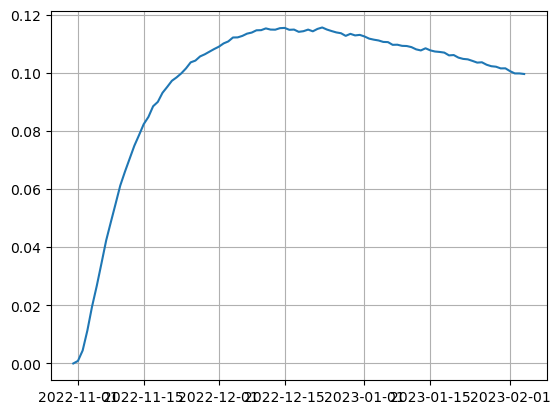

In [21]:
valor_deseado_intc=data_intel[-1]*1.1

probabilidad_intc=(precio_sim_intc >= valor_deseado_intc).mean(axis=1)
probabilidad_intc #Probabilidad de que el rendimiento sea mayor a 10% al final del año
plt.figure()
plt.plot(probabilidad_intc)
plt.grid()

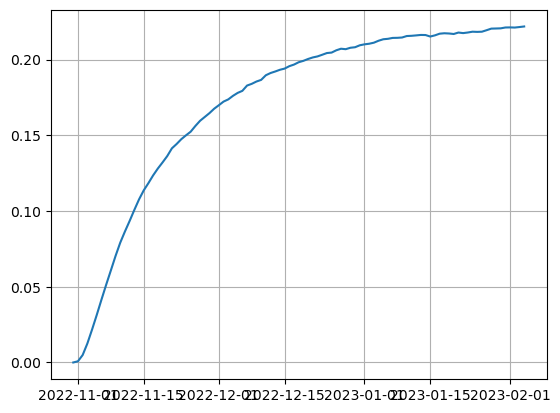

In [22]:
valor_deseado_orcl=data_orcl[-1]*1.1

probabilidad_orcl=(precio_sim_orcl >= valor_deseado_orcl).mean(axis=1)
probabilidad_orcl #Probabilidad de que el rendimiento sea mayor a 10% al final del año
plt.figure()
plt.plot(probabilidad_orcl)
plt.grid()

### ORACLE generaría más expectativa, ya que hay mayor parte de la curva arriba del 0.10

---------------

#### Extra <font size='1'>(10 puntos)</font>

Compara tus resultados con los valores verdaderos.

[*********************100%***********************]  1 of 1 completed


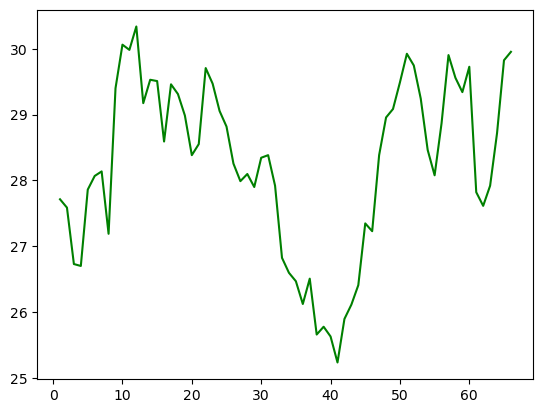

In [27]:
data_intc_real=getClose("INTC", "2022-10-31", "2023-02-05")
intc_vec=np.array(data_intc_real)
x=np.arange(1,67,1)
plt.plot(x,intc_vec, "g")

In [34]:
orcl_vec[-1], intc_vec[-1]

(89.24627685546875, 29.954999923706055)

[*********************100%***********************]  1 of 1 completed


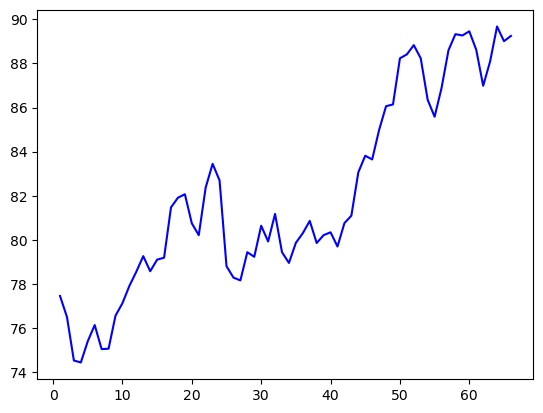

In [32]:
data_orcl_real=getClose("ORCL", "2022-10-31", "2023-02-05")
orcl_vec=np.array(data_orcl_real)
x=np.arange(1,67,1)
plt.plot(x,orcl_vec, "b")